<a href="https://colab.research.google.com/github/L-Somorjit/The-beginning/blob/master/LR_picture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/learning_ML

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/learning_ML


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import h5py
from PIL import Image
from scipy import ndimage

In [ ]:
def load_datasets():

  train_set=h5py.File("train_catvnoncat.h5","r")
  test_set=h5py.File("test_catvnoncat.h5","r")

  train_set_x_ori=np.array(train_set["train_set_x"][:])
  train_set_y=np.array(train_set["train_set_y"][:])
  test_set_x_ori=np.array(test_set["test_set_x"][:])
  test_set_y=np.array(test_set["test_set_y"][:])

  classes=np.array(train_set["list_classes"][:])

  train_set_y=train_set_y.reshape(1,train_set_x_ori.shape[0])
  test_set_y=test_set_y.reshape(1,test_set_y.shape[0])

  return train_set_x_ori, test_set_x_ori, train_set_y, test_set_y, classes

In [ ]:
display1=h5py.File("train_catvnoncat.h5","r")
display1.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [ ]:
display1['list_classes']

<HDF5 dataset "list_classes": shape (2,), type "|S7">

In [ ]:
display1["train_set_x"]

<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">

In [ ]:
display1["train_set_x"][:]

array([[[[ 17,  31,  56],
         [ 22,  33,  59],
         [ 25,  35,  62],
         ...,
         [  1,  28,  57],
         [  1,  26,  56],
         [  1,  22,  51]],

        [[ 25,  36,  62],
         [ 28,  38,  64],
         [ 30,  40,  67],
         ...,
         [  1,  27,  56],
         [  1,  25,  55],
         [  2,  21,  51]],

        [[ 32,  40,  67],
         [ 34,  42,  69],
         [ 35,  42,  70],
         ...,
         [  1,  25,  55],
         [  0,  24,  54],
         [  1,  21,  51]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [ ]:
classes=np.array(display1["list_classes"][:])
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [ ]:
train_set_x_ori, test_set_x_ori, train_set_y, test_set_y, classes=load_datasets()

y= [0]it is non-cat image


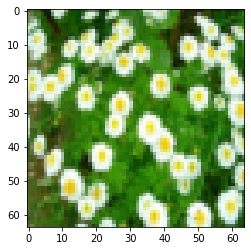

In [ ]:
index=123
print("y= " + str(train_set_y[:,index])+ "it is "+classes[np.squeeze(train_set_y[:,index])].decode("utf-8")+" image")
plt.imshow(train_set_x_ori[index])

In [ ]:
n_train=train_set_x_ori.shape[0]
n_test=test_set_x_ori.shape[0]
h=train_set_x_ori.shape[1]
print("Number of training examples: "+str(n_train))
print("Number of testing examples: "+str(n_test))
print("Each image is of size: "+str(h)+", "+str(h)+", 3")
print("train_set_x shape: "+str(train_set_x_ori.shape))
print("train_set_y shape: "+str(train_set_y.shape))
print("test_set_x shape: "+str(test_set_x_ori.shape))
print("test_set_y shape: "+str(test_set_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: 64, 64, 3
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [ ]:
train_set_x_flatten=train_set_x_ori.reshape(train_set_x_ori.shape[0],-1).T
test_set_x_flatten=test_set_x_ori.reshape(test_set_x_ori.shape[0],-1).T

In [ ]:
print("shape of train_set_x_flatten: " +str(train_set_x_flatten.shape))
print("shape of train_set_y :"+ str(train_set_y.shape))
print("shape of test_set_x_flatten: "+str(test_set_x_flatten.shape))
print("shape of test_set_y: "+str(test_set_y.shape))

shape of train_set_x_flatten: (12288, 209)
shape of train_set_y :(1, 209)
shape of test_set_x_flatten: (12288, 50)
shape of test_set_y: (1, 50)


In [ ]:
train_set_x=train_set_x_flatten/255.
test_set_x=test_set_x_flatten/255.

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


def initialize(d):
  w=np.zeros((d,1))
  b=0
  assert(w.shape==(d,1))
  return w,b

def propagate(w,b,X,y):
  z=np.dot(w.T, X)+b
  h=sigmoid(z)
  m=X.shape[1]
  cost=-1/m * np.sum((y*np.log(h))+((1-y)*np.log(1-h)))

  dw=1/m* np.dot(X,(h-y).T)
  db=1/m*np.sum(h-y)
  cost=np.squeeze(cost)
  assert(dw.shape==w.shape)

  par={'dw':dw, 'db':db}

  return cost, par

def optimize(w,b,X,y,iteration,lr,print_cost=False):
  costs=[]
  for i in range(iteration):
    cos,par=propagate(w,b,X,y)
    dw=par['dw']
    db=par['db']

    w=w-lr*dw
    b=b-lr*db

    if i%100 ==0:
      costs.append(cos)

    if print_cost and i%100 ==0:
      print('cost at %d iteration is %f'%(i,cos))

  params={'w':w,'b':b}
  grads={'dw':dw, 'db':db}

  return params, grads, costs


def predict(w,b,X):
  assert(w.shape==(X.shape[0],1))
  z=np.dot(w.T,X)+b
  h=sigmoid(z)
  y_h=(h>=0.5)*1

  return y_h

In [ ]:
def model(X_train, Y_train, X_test, Y_test, iteration=1000, lr=0.5,print_cost=False):
  
  dim=X_train.shape[0]
  w,b=initialize(dim)

  parameter, gradient, costs=optimize(w,b,X_train, Y_train, iteration, lr, print_cost)

  W=parameter['w']
  b=parameter['b']

  Y_train_P=predict(W, b, X_train)
  Y_test_P=predict(W, b, X_test)

  print("Accuracy of train data is {} %".format(100-(np.mean(np.abs(Y_train_P - Y_train))*100)))
  print("Accuracy of test data is {} %".format(100-(np.mean(np.abs(Y_test_P - Y_test)))*100))

  d={'w':W, 'b':b, 'Y_t':Y_train_P, 'Y_te':Y_test_P, 'cost':costs, 'it':iteration, 'lr':lr}

  return d



In [ ]:
d=model(train_set_x, train_set_y, test_set_x, test_set_y, iteration=2000, lr=0.005, print_cost=True)

cost at 0 iteration is 0.693147
cost at 100 iteration is 0.584508
cost at 200 iteration is 0.466949
cost at 300 iteration is 0.376007
cost at 400 iteration is 0.331463
cost at 500 iteration is 0.303273
cost at 600 iteration is 0.279880
cost at 700 iteration is 0.260042
cost at 800 iteration is 0.242941
cost at 900 iteration is 0.228004
cost at 1000 iteration is 0.214820
cost at 1100 iteration is 0.203078
cost at 1200 iteration is 0.192544
cost at 1300 iteration is 0.183033
cost at 1400 iteration is 0.174399
cost at 1500 iteration is 0.166521
cost at 1600 iteration is 0.159305
cost at 1700 iteration is 0.152667
cost at 1800 iteration is 0.146542
cost at 1900 iteration is 0.140872
Accuracy of train data is 99.04306220095694 %
Accuracy of test data is 70.0 %


I predicted this as non-catimage


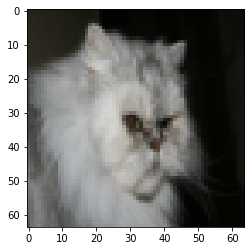

In [ ]:
test_p=d['Y_te']
index=10
plt.imshow(test_set_x[:,index].reshape((h, h, 3)))
print("I predicted this as "+str(classes[np.squeeze(test_p[:,index])].decode('utf-8'))+"image")

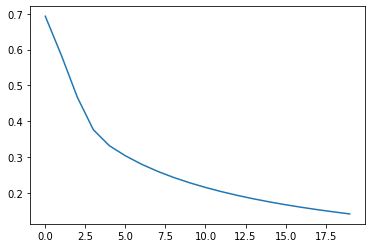

In [ ]:
c=d['cost']
plt.plot(c)

Accuracy of train data is 91.38755980861244 %
Accuracy of test data is 68.0 %
----------------------------------------------------------
Accuracy of train data is 99.52153110047847 %
Accuracy of test data is 70.0 %
----------------------------------------------------------
Accuracy of train data is 100.0 %
Accuracy of test data is 68.0 %
----------------------------------------------------------
Accuracy of train data is 100.0 %
Accuracy of test data is 68.0 %
----------------------------------------------------------
Accuracy of train data is 100.0 %
Accuracy of test data is 68.0 %
----------------------------------------------------------


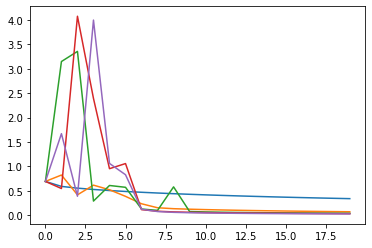

In [ ]:
learning=[0.001,0.01, 0.015, 0.018, 0.02]
models={}
for i in learning:
  models[str(i)]=model(train_set_x, train_set_y, test_set_x, test_set_y, iteration=2000, lr=i, print_cost=False)
  print("----------------------------------------------------------")



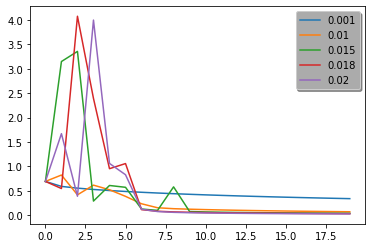

In [ ]:
for i in learning:
  plt.plot(np.squeeze(models[str(i)]['cost']), label=str(models[str(i)]['lr']))
plt.xlabel="Iteration (Hundreds)"
plt.ylabel="Cost"

legend=plt.legend(loc="upper right", shadow=True)
frame=legend.get_frame()
frame.set_facecolor('0.67')
plt.show()

In [ ]:
str(models[str(i)]['lr'])

'0.02'

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive


In [ ]:
image=ndimage.imread("cat.jpg")

AttributeError: ignored

In [ ]:
import cv2
import scipy.misc
image=cv2.imread("cat.jpg")

In [ ]:
#my_image = image   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.

#image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

AttributeError: ignored